In [1]:
import numpy as np
import src

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook')

# Четверта задача, адаптивні алгоритми

In [3]:
tau = .4
lambda_initial = 1
tolerances = (1e-3, 1e-6)
sizes = (500, 1_000, 2_000, 5_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')

In [4]:
def f(x: np.array) -> np.array:
    """ function for fourth problem """
    y = np.hstack([[0], x, [0]])
    f1 = y[1:-1]**2 + y[:-2]**2 + y[1:-1] * y[:-2] + y[1:-1] * y[2:]
    return f1 + d.dot(x) + c

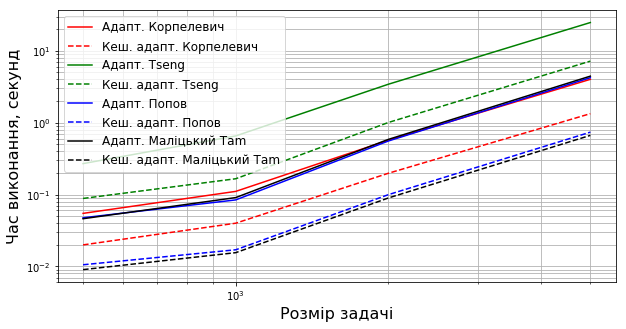

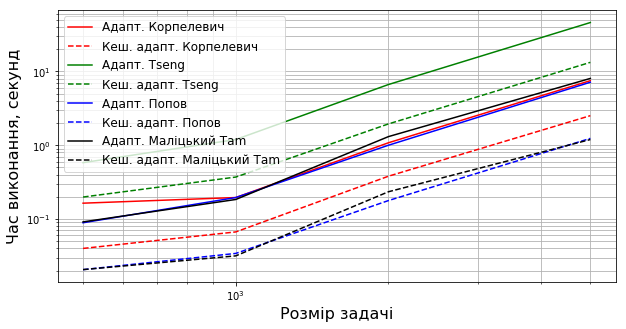

In [5]:
for i, tolerance in enumerate(tolerances):
    iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}
    
    for size in sizes:
        d, c = src.generate_tridiagonal_matrix(size)
        x_initial = np.zeros(size)

        _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
            src.adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                     operator=f,
                                     projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
            src.cached_adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                            operator=f,
                                            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
            src.adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                               operator=f,
                               projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
            src.cached_adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                                      operator=f,
                                      projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
            src.adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                               operator=f,
                               projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
            src.cached_adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                                      operator=f,
                                      projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
            src.adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                       lambda_initial, lambda_initial, tolerance,
                                       operator=f,
                                       projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
            src.cached_adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                              lambda_initial, lambda_initial, tolerance,
                                              operator=f,
                                              projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))


    src.save_values_to_table(times, sizes, fn=f'4/adapt/time-{i}', tp='time')
    src.save_values_to_table(iters, sizes, fn=f'4/adapt/iter-{i}', tp='iter')

    src.save_values_to_image(times,
                             sizes,
                             fn=f'4/adapt/time-{i}',
                             styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                             # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                             title='Час виконання, секунд')

# Четверта задача із розрідженими матрицями, адаптивні алгоритми

In [6]:
tau = .4
lambda_initial = 1
tolerances = (1e-3, 1e-6)
sizes = (20_000, 50_000, 100_000, 200_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')

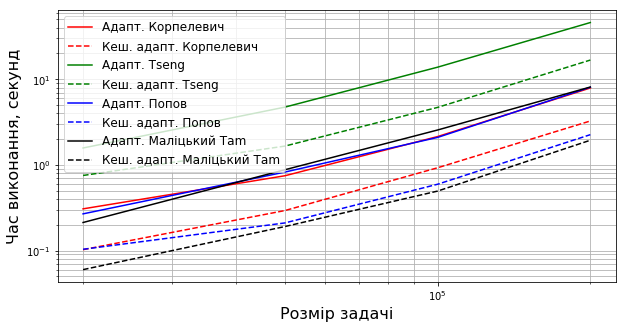

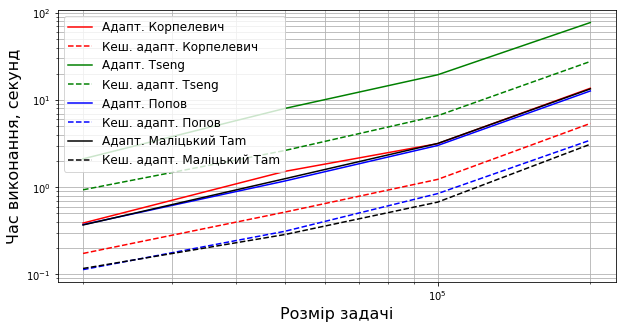

In [7]:
for i, tolerance in enumerate(tolerances):
    iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}
    
    for size in sizes:
        d, c = src.generate_sparse_tridiagonal_matrix(size)
        x_initial = np.zeros(size)

        _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
            src.adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                     operator=f,
                                     projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
            src.cached_adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                            operator=f,
                                            projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
            src.adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                               operator=f,
                               projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
            src.cached_adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                                      operator=f,
                                      projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
            src.adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                               operator=f,
                               projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
            src.cached_adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                                      operator=f,
                                      projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
            src.adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                       lambda_initial, lambda_initial, tolerance,
                                       operator=f,
                                       projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))

        _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
            src.cached_adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                              lambda_initial, lambda_initial, tolerance,
                                              operator=f,
                                              projector=lambda x: np.maximum(x, np.zeros(x.shape[0])))


    src.save_values_to_table(times, sizes, fn=f'4/sparse/adapt/time-{i}', tp='time')
    src.save_values_to_table(iters, sizes, fn=f'4/sparse/adapt/iter-{i}', tp='iter')

    src.save_values_to_image(times,
                             sizes,
                             fn=f'4/sparse/adapt/time-{i}',
                             styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                             # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                             title='Час виконання, секунд')